In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from keras import layers
from keras.datasets import mnist

In [3]:
(train, trlab), (test, telab) = mnist.load_data()

# SEQUENTIAL API

In [4]:
"""Approach 1:

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
"""

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
#model.weights (Haven't been created yet)

In [6]:
model.build(input_shape=(None, 3))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.09671529,  0.09901774,  0.02665168,  0.1604566 ,  0.15425214,
          0.17075008,  0.2825625 , -0.27594325,  0.29096723,  0.05557388,
          0.29784083,  0.04950771, -0.27936178,  0.20785278, -0.24713138,
          0.27431554,  0.04867598, -0.01867783,  0.12842888, -0.05664144,
          0.24610299,  0.0524472 , -0.19779262, -0.00081921, -0.13091876,
          0.15476006,  0.02480799,  0.2872755 , -0.27338374, -0.20966783,
          0.02600387, -0.10991028,  0.16346559,  0.25868595,  0.134464  ,
         -0.10142887, -0.23895395,  0.2267468 ,  0.2064991 , -0.00909308,
          0.14954805, -0.1652582 , -0.03713682, -0.2805137 ,  0.01168534,
          0.06794873, -0.10697612, -0.06194219, -0.26079255,  0.00477907,
          0.15892783, -0.04773122, -0.2844241 , -0.22449283, -0.02844977,
         -0.23900717, -0.21861795, -0.28319222,  0.10552576,  0.06034222,
          0.27956355,  0.15095082,  0.2922094

In [9]:
#to be able to view summary whenever you want, say after adding each layer, add input shape at beginning only
model = keras.Sequential(name='keras1')
model.add(layers.Input(shape=(3, ))) #shape is shape of each sample, not batch
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))

In [10]:
model = keras.Sequential(name = 'model2')
model.add(layers.Input(shape=(3, )))

model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Dense(128, activation='relu'))
model.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
Total params: 8,576
Trainable params: 8,576
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 9,866
Trainable params: 9,866
Non-trainable params: 0
_________________________________________________________________


# FUNCTIONAL API

In [13]:
inputs = keras.Input(shape=(3, ), name='my_inputs')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
#Build model with multiple inputs and outputs:
#Customer support ranking by priority
#3 inputs, 2 outputs
#inputs = title(text), text_body(text), tags(categorical)
#outputs = ranking(sigmoid), dept(softmax)

vocab_size=10000
num_tags = 100
depts = 4

#inputs
title = keras.Input(shape=(vocab_size, ), name='title')
text_body = keras.Input(shape=(vocab_size, ), name='textbody')
tags = keras.Input(shape=(num_tags,), name='tags')

#features
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

#outputs
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
dept = layers.Dense(depts, activation='softmax', name='dept')(features)

#model
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, dept])


In [15]:
#providing dummy input and target data

import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
dept_data = np.random.randint(0, 2, size=(num_samples, depts))

model.compile(optimizer='rmsprop',
             loss=['mean_squared_error', 'categorical_crossentropy'],
             metrics=[['mean_absolute_error'],['accuracy']])

model.fit([title_data, text_body_data, tags_data],
         [priority_data, dept_data],
         epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
              [priority_data, dept_data])

priority_preds, dept_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step - loss: 23.3584 - priority_loss: 0.3161 - dept_loss: 23.0422 - priority_mean_absolute_error: 0.4814 - dept_accuracy: 0.2445


In [16]:
keras.utils.plot_model(model, "model.png")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
model.layers

In [18]:
model.layers[3].input

[<tf.Tensor 'title:0' shape=(None, 10000) dtype=float32>,
 <tf.Tensor 'textbody:0' shape=(None, 10000) dtype=float32>,
 <tf.Tensor 'tags:0' shape=(None, 100) dtype=float32>]

In [19]:
for i in range(len(model.layers)):
    print("Input of layer ", i, " = ", model.layers[i].input)
    print("Output of layer ", i, " = ", model.layers[i].output, "\n")

Input of layer  0  =  Tensor("title:0", shape=(None, 10000), dtype=float32)
Output of layer  0  =  Tensor("title:0", shape=(None, 10000), dtype=float32) 

Input of layer  1  =  Tensor("textbody:0", shape=(None, 10000), dtype=float32)
Output of layer  1  =  Tensor("textbody:0", shape=(None, 10000), dtype=float32) 

Input of layer  2  =  Tensor("tags:0", shape=(None, 100), dtype=float32)
Output of layer  2  =  Tensor("tags:0", shape=(None, 100), dtype=float32) 

Input of layer  3  =  [<tf.Tensor 'title:0' shape=(None, 10000) dtype=float32>, <tf.Tensor 'textbody:0' shape=(None, 10000) dtype=float32>, <tf.Tensor 'tags:0' shape=(None, 100) dtype=float32>]
Output of layer  3  =  Tensor("concatenate/concat:0", shape=(None, 20100), dtype=float32) 

Input of layer  4  =  Tensor("concatenate/concat:0", shape=(None, 20100), dtype=float32)
Output of layer  4  =  Tensor("dense_7/Relu:0", shape=(None, 64), dtype=float32) 

Input of layer  5  =  Tensor("dense_7/Relu:0", shape=(None, 64), dtype=float3

In [20]:
#To add new output using existing features: difficulty : ['easy', 'medium', 'hard']
#instead of retraining whole model, we can use features from layer 4

features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, dept, difficulty])

# MODEL SUBCLASSING

Basically implementing layers and shit from scratch

In [21]:
class Model(keras.Model):
    
    def __init__ (self, depts):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.dept_clf = layers.Dense(depts, activation='softmax')
        
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        dept = self.dept_clf(features)
        
        return priority, dept

In [22]:
model = Model(depts=4)

priority, dept = model({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

In [23]:
model.compile(optimizer='rmsprop',
             loss=['mean_squared_error', 'categorical_crossentropy'],
             metrics=[['mean_absolute_error'],['accuracy']])

model.fit({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
         [priority_data, dept_data],
         epochs=1)

model.evaluate({'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
              [priority_data, dept_data])

priority_preds, dept_preds = model.predict({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
40/40 [==============================] - 0s 5ms/step - loss: 20.2386 - output_1_loss: 0.3534 - output_2_loss: 19.8852 - output_1_mean_absolute_error: 0.5186 - output_2_accuracy: 0.2453


# CUSTOM METRICS

In [24]:
#writing custom RMSE metric

class RMSE(keras.metrics.Metric):
    
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples', dtype='int32', initializer='zeros')
        
    def update_state(self, ytrue, ypred, sample_weight=None):
        ytrue = tf.one_hot(ytrue, depth=tf.shape(ypred)[1])
        mse = tf.reduce_sum(tf.square(ytrue-ypred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(ypred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [25]:
from tensorflow.keras.datasets import mnist

def get_mnist_model(): 
 inputs = keras.Input(shape=(28 * 28,))
 features = layers.Dense(512, activation="relu")(inputs)
 features = layers.Dropout(0.5)(features)
 outputs = layers.Dense(10, activation="softmax")(features)
 model = keras.Model(inputs, outputs)
 return model

(images, labels), (test_images, test_labels) = mnist.load_data() 

images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy", RMSE()]) 

model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels)) 

test_metrics = model.evaluate(test_images, test_labels) 
predictions = model.predict(test_images)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2931 - accuracy: 0.9128 - rmse: 7.1851 - val_loss: 0.1554 - val_accuracy: 0.9564 - val_rmse: 7.3592
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1631 - accuracy: 0.9544 - rmse: 7.3569 - val_loss: 0.1257 - val_accuracy: 0.9670 - val_rmse: 7.3998
Epoch 3/3
313/313 [===========================

# CALLBACKS

In [26]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
    keras.callbacks.ModelCheckpoint(filepath='checkpoint_path.keras', monitor='val_loss', save_best_only=True)
]

In [27]:
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 
model.fit(train_images, train_labels, epochs=10, callbacks=callbacks, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2928 - accuracy: 0.9138 - val_loss: 0.1522 - val_accuracy: 0.9572
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1636 - accuracy: 0.9538 - val_loss: 0.1180 - val_accuracy: 0.9678
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1379 - accuracy: 0.9634 - val_loss: 0.1246 - val_accuracy: 0.9672
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1235 - accuracy: 0.9683 - val_loss: 0.1153 - val_accuracy: 0.9736
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1161 - accuracy: 0.9711 - val_loss: 0.1085 - val_accuracy: 0.9744
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1103 - accuracy: 0.9727 - val_loss: 0.1139 - val_accuracy: 0.9758
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1047 - accuracy: 0.9752 - val_loss: 0.1096 - val_accuracy:

In [28]:
model.save('./')
model1 = keras.models.load_model('checkpoint_path.keras')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets


In [29]:
model1.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# CUSTOM CALLBACKS

In [30]:
from matplotlib import pyplot as plt

In [33]:
from matplotlib import pyplot as plt
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
        label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2955 - accuracy: 0.9120 - val_loss: 0.1491 - val_accuracy: 0.9569
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1631 - accuracy: 0.9540 - val_loss: 0.1152 - val_accuracy: 0.9670
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9633 - val_loss: 0.1174 - val_accuracy: 0.9708
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1257 - accuracy: 0.9681 - val_loss: 0.1163 - val_accuracy: 0.9712
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1171 - accuracy: 0.9702 - val_loss: 0.1085 - val_accuracy: 0.9751
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1087 - accuracy: 0.9737 - val_loss: 0.1086 - val_accuracy: 0.9765
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1061 - accuracy: 0.9750 - val_loss: 0.1179 - val_accuracy:

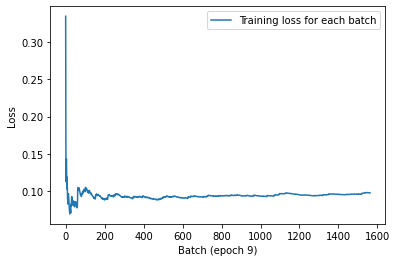

In [36]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels,
         epochs=10,
         callbacks=[LossHistory()],
         validation_data = (val_images, val_labels))

# TENSORBOARD

In [39]:
model = get_mnist_model()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

tensorboard = keras.callbacks.TensorBoard(log_dir='./')

model.fit(train_images, train_labels,
         epochs=10,
         callbacks=[tensorboard],
         validation_data = (val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.9130 - val_loss: 0.1342 - val_accuracy: 0.9593
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1492 - accuracy: 0.9540 - val_loss: 0.0970 - val_accuracy: 0.9711
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1113 - accuracy: 0.9652 - val_loss: 0.0999 - val_accuracy: 0.9710
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0950 - accuracy: 0.9703 - val_loss: 0.0805 - val_accuracy: 0.9765
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9733 - val_loss: 0.0760 - val_accuracy: 0.9777
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0760 - accuracy: 0.9753 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9777 - val_loss: 0.0755 - val_accuracy:

# CUSTOM TRAINING AND EVALUATION LOOP

In [45]:
model = get_mnist_model()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = tf.keras.metrics.Mean()

#Train function for each loop
def train_step(inputs, targets):
    with tf.GradientTape() as tape: 
        predictions = model(inputs, training=True) 
        loss = loss_fn(targets, predictions) 
    gradients = tape.gradient(loss, model.trainable_weights) 
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) 
    logs = {} 
    for metric in metrics: 
        metric.update_state(targets, predictions) 
        logs[metric.name] = metric.result() 
    loss_tracking_metric.update_state(loss) 
    logs["loss"] = loss_tracking_metric.result() 
    return logs 



def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [46]:
#The loop itself
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")
        

AttributeError: 'SparseCategoricalAccuracy' object has no attribute 'reset_state'

In [47]:
#Evaluation loop

@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False) 
    loss = loss_fn(targets, predictions)
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
        loss_tracking_metric.update_state(loss)
        logs["val_loss"] = loss_tracking_metric.result()
    return logs
    
    
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics() 
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch) 
print("Evaluation results:") 
for key, value in logs.items(): 
    print(f"...{key}: {value:.4f}")

AttributeError: 'SparseCategoricalAccuracy' object has no attribute 'reset_state'